#Adaptado por Bruno Menezes para finalidade acadêmica

In [1]:
x_train_file = open(r'/content/X_train.txt', 'r')
y_train_file = open(r'/content/y_train.txt', 'r')
x_test_file = open(r'/content/X_test.txt', 'r')
y_test_file = open(r'/content/y_test.txt', 'r')

In [2]:
x_train = []
y_train = []
x_test = []
y_test = []

In [3]:
labels = {1:'Caminhando', 2:'Subindo Escada', 3:'Descendo Escada',
          4:'Sentado', 5:'Em pé', 6:'Deitado'}

In [4]:
for x in x_train_file:
    x_train.append([float(ts) for ts in x.split()])
    
for y in y_train_file:
    y_train.append(int(y.rstrip('\n')))
    
for x in x_test_file:
    x_test.append([float(ts) for ts in x.split()])
    
for y in y_test_file:
    y_test.append(int(y.rstrip('\n')))

In [6]:
 import numpy as np
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)                 


x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [7]:
colors = ['#D62728','#2C9F2C','#FD7F23','#1F77B4','#9467BD',
          '#8C564A','#7F7F7F','#1FBECF','#E377C2','#BCBD27']

In [9]:
!pip install dtaidistance



from dtaidistance import dtw

idx=0
for r in range(len(x_test)):
    distance = dtw.distance(x_train[idx], x_test[r], window=20, use_pruning='True')
for r in range(len(x_test)):
    distance = dtw.distance(x_train[idx], x_test[r])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 538 kB 16.5 MB/s 


In [11]:
def classifyNN(k:int, idx:int) -> str:
    
    idxs=range(0,x_train.shape[0])
    n=x_train.shape[0]
    distances=[]
    counters={}
    c=1;
    max_value=0
    for r in range(n):
        distances.append(dtw.distance(x_test[idx], x_train[idxs[r]],window=10,use_pruning=True))
        NN=sorted(range(len(distances)), key=lambda i: distances[i], reverse=False)[:k]
    
    for l in labels.values():
        counters[l]=0
        for r in NN:
          l=labels[y_train[r]]
          counters[l]+=1
          if (counters[l])>max_value:
            max_value=counters[l]
        #print('NN(%d) has label %s' % (c,l))
            c+=1
    
    # find the label(s) with the highest frequency
    keys = [k for k in counters if counters[k] == max_value]
    
    # in case of a tie, return one at random
    return (sample(keys,1)[0])

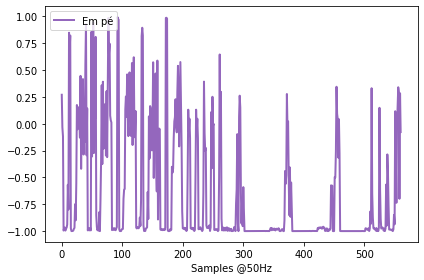

In [14]:
import matplotlib.pyplot as plt

k=20
idx=3
plt.plot(x_test[idx], label=labels[y_test[idx]], color=colors[y_test[idx]-1], linewidth=2)
plt.xlabel('Samples @50Hz')
plt.legend(loc='upper left')
plt.tight_layout()

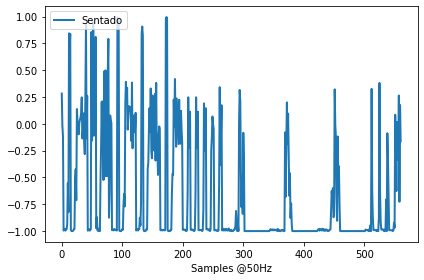

In [16]:
k=20
idx=200
plt.plot(x_test[idx], label=labels[y_test[idx]], color=colors[y_test[idx]-1], linewidth=2)
plt.xlabel('Samples @50Hz')
plt.legend(loc='upper left')
plt.tight_layout()

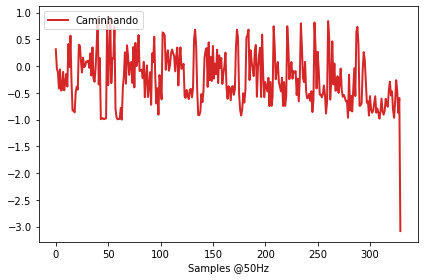

In [20]:
k=20
idx=233
plt.plot(x_test[idx], label=labels[y_test[idx]], color=colors[y_test[idx]-1], linewidth=2)
plt.xlabel('Samples @50Hz')
plt.legend(loc='upper left')
plt.tight_layout()